## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.
D:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passing (type, 1) or '1type' as

In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
"""
Compile 模型
"""
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 9s 181us/step - loss: 1.9223 - accuracy: 0.3073 - val_loss: 1.7629 - val_accuracy: 0.3593
Epoch 2/500
50000/50000 [==============================] - 10s 206us/step - loss: 1.7027 - accuracy: 0.3890 - val_loss: 1.6354 - val_accuracy: 0.4213
Epoch 3/500
50000/50000 [==============================] - 9s 186us/step - loss: 1.6127 - accuracy: 0.4246 - val_loss: 1.6923 - val_accuracy: 0.4060
Epoch 4/500
50000/50000 [==============================] - 10s 200us/step - loss: 1.5493 - accuracy: 0.4470 - val_loss: 1.6545 - val_accuracy: 0.4203
Epoch 5/500
50000/50000 [==============================] - 9s 188us/step - loss: 1.5027 - accuracy: 0.4627 - val_loss: 1.4957 - val_accuracy: 0.4719
Epoch 6/500
50000/50000 [==============================] - 8s 165us/step - loss: 1.4545 - accuracy: 0.4822 - val_loss: 1.4691 - val_accuracy: 0.4791
Epoch 

50000/50000 [==============================] - 8s 167us/step - loss: 0.5799 - accuracy: 0.7920 - val_loss: 1.9179 - val_accuracy: 0.5210
Epoch 54/500
50000/50000 [==============================] - 9s 183us/step - loss: 0.5787 - accuracy: 0.7933 - val_loss: 1.9564 - val_accuracy: 0.5059
Epoch 55/500
50000/50000 [==============================] - 9s 176us/step - loss: 0.5758 - accuracy: 0.7931 - val_loss: 1.9223 - val_accuracy: 0.5212
Epoch 56/500
50000/50000 [==============================] - 9s 189us/step - loss: 0.5676 - accuracy: 0.7969 - val_loss: 1.9745 - val_accuracy: 0.5211
Epoch 57/500
50000/50000 [==============================] - 9s 175us/step - loss: 0.5521 - accuracy: 0.8032 - val_loss: 1.9963 - val_accuracy: 0.5169
Epoch 58/500
50000/50000 [==============================] - 10s 191us/step - loss: 0.5429 - accuracy: 0.8057 - val_loss: 1.9731 - val_accuracy: 0.5212
Epoch 59/500
50000/50000 [==============================] - 9s 179us/step - loss: 0.5256 - accuracy: 0.8130 - va

50000/50000 [==============================] - 8s 163us/step - loss: 0.2315 - accuracy: 0.9179 - val_loss: 3.3192 - val_accuracy: 0.4939
Epoch 108/500
50000/50000 [==============================] - 8s 166us/step - loss: 0.2787 - accuracy: 0.9014 - val_loss: 3.3198 - val_accuracy: 0.4967
Epoch 109/500
50000/50000 [==============================] - 8s 169us/step - loss: 0.2639 - accuracy: 0.9058 - val_loss: 3.2570 - val_accuracy: 0.4983
Epoch 110/500
50000/50000 [==============================] - 8s 162us/step - loss: 0.2493 - accuracy: 0.9109 - val_loss: 3.3328 - val_accuracy: 0.5055
Epoch 111/500
50000/50000 [==============================] - 8s 163us/step - loss: 0.2347 - accuracy: 0.9156 - val_loss: 3.4048 - val_accuracy: 0.4967
Epoch 112/500
50000/50000 [==============================] - 8s 163us/step - loss: 0.2401 - accuracy: 0.9142 - val_loss: 3.2892 - val_accuracy: 0.5031
Epoch 113/500
50000/50000 [==============================] - 9s 174us/step - loss: 0.2087 - accuracy: 0.9241

50000/50000 [==============================] - 8s 164us/step - loss: 0.1575 - accuracy: 0.9449 - val_loss: 4.1100 - val_accuracy: 0.4959
Epoch 162/500
50000/50000 [==============================] - 9s 171us/step - loss: 0.1607 - accuracy: 0.9430 - val_loss: 4.0826 - val_accuracy: 0.4951
Epoch 163/500
50000/50000 [==============================] - 9s 174us/step - loss: 0.1641 - accuracy: 0.9426 - val_loss: 4.1258 - val_accuracy: 0.4919
Epoch 164/500
50000/50000 [==============================] - 9s 171us/step - loss: 0.2111 - accuracy: 0.9261 - val_loss: 4.1531 - val_accuracy: 0.4922
Epoch 165/500
50000/50000 [==============================] - 8s 163us/step - loss: 0.1451 - accuracy: 0.9478 - val_loss: 4.1083 - val_accuracy: 0.4948
Epoch 166/500
50000/50000 [==============================] - 8s 164us/step - loss: 0.1692 - accuracy: 0.9411 - val_loss: 4.2427 - val_accuracy: 0.4861
Epoch 167/500
50000/50000 [==============================] - 8s 166us/step - loss: 0.1769 - accuracy: 0.9380

50000/50000 [==============================] - 9s 186us/step - loss: 0.2330 - accuracy: 0.9275 - val_loss: 4.4616 - val_accuracy: 0.4962
Epoch 216/500
50000/50000 [==============================] - 9s 184us/step - loss: 0.1161 - accuracy: 0.9585 - val_loss: 4.4374 - val_accuracy: 0.4968
Epoch 217/500
50000/50000 [==============================] - 9s 176us/step - loss: 0.0946 - accuracy: 0.9672 - val_loss: 4.5306 - val_accuracy: 0.4937
Epoch 218/500
50000/50000 [==============================] - 10s 191us/step - loss: 0.1285 - accuracy: 0.9565 - val_loss: 4.4934 - val_accuracy: 0.4913
Epoch 219/500
50000/50000 [==============================] - 9s 177us/step - loss: 0.1034 - accuracy: 0.9641 - val_loss: 4.6389 - val_accuracy: 0.4927
Epoch 220/500
50000/50000 [==============================] - 9s 172us/step - loss: 0.1326 - accuracy: 0.9551 - val_loss: 4.5276 - val_accuracy: 0.4950
Epoch 221/500
50000/50000 [==============================] - 8s 165us/step - loss: 0.1690 - accuracy: 0.943

50000/50000 [==============================] - 9s 184us/step - loss: 0.0776 - accuracy: 0.9724 - val_loss: 4.7828 - val_accuracy: 0.4912
Epoch 270/500
50000/50000 [==============================] - 9s 181us/step - loss: 0.0636 - accuracy: 0.9778 - val_loss: 4.8284 - val_accuracy: 0.4932
Epoch 271/500
50000/50000 [==============================] - 9s 189us/step - loss: 0.1096 - accuracy: 0.9638 - val_loss: 4.8138 - val_accuracy: 0.4919
Epoch 272/500
50000/50000 [==============================] - 12s 235us/step - loss: 0.1251 - accuracy: 0.9576 - val_loss: 4.7716 - val_accuracy: 0.4922
Epoch 273/500
50000/50000 [==============================] - 10s 201us/step - loss: 0.1201 - accuracy: 0.9586 - val_loss: 4.8015 - val_accuracy: 0.4896
Epoch 274/500
50000/50000 [==============================] - 9s 184us/step - loss: 0.0820 - accuracy: 0.9716 - val_loss: 4.8814 - val_accuracy: 0.4951
Epoch 275/500
50000/50000 [==============================] - 9s 180us/step - loss: 0.1239 - accuracy: 0.95

50000/50000 [==============================] - 9s 179us/step - loss: 0.1359 - accuracy: 0.9559 - val_loss: 5.1246 - val_accuracy: 0.4835
Epoch 324/500
50000/50000 [==============================] - 8s 169us/step - loss: 0.1938 - accuracy: 0.9400 - val_loss: 4.9381 - val_accuracy: 0.4877
Epoch 325/500
50000/50000 [==============================] - 9s 175us/step - loss: 0.0810 - accuracy: 0.9732 - val_loss: 4.9500 - val_accuracy: 0.4923
Epoch 326/500
50000/50000 [==============================] - 9s 171us/step - loss: 0.0294 - accuracy: 0.9908 - val_loss: 4.9711 - val_accuracy: 0.4964
Epoch 327/500
50000/50000 [==============================] - 8s 165us/step - loss: 0.0188 - accuracy: 0.9947 - val_loss: 4.9581 - val_accuracy: 0.5005
Epoch 328/500
50000/50000 [==============================] - 8s 169us/step - loss: 0.0134 - accuracy: 0.9964 - val_loss: 5.0032 - val_accuracy: 0.4978
Epoch 329/500
50000/50000 [==============================] - 8s 164us/step - loss: 0.0426 - accuracy: 0.9859

50000/50000 [==============================] - 8s 168us/step - loss: 0.0478 - accuracy: 0.9847 - val_loss: 5.1840 - val_accuracy: 0.4941
Epoch 378/500
50000/50000 [==============================] - 8s 169us/step - loss: 0.0460 - accuracy: 0.9847 - val_loss: 5.0913 - val_accuracy: 0.4940
Epoch 379/500
50000/50000 [==============================] - 8s 167us/step - loss: 0.1088 - accuracy: 0.9648 - val_loss: 5.1673 - val_accuracy: 0.4880
Epoch 380/500
50000/50000 [==============================] - 9s 171us/step - loss: 0.1121 - accuracy: 0.9647 - val_loss: 5.0955 - val_accuracy: 0.4963
Epoch 381/500
50000/50000 [==============================] - 8s 169us/step - loss: 0.0627 - accuracy: 0.9781 - val_loss: 5.1509 - val_accuracy: 0.4963
Epoch 382/500
50000/50000 [==============================] - 8s 164us/step - loss: 0.0774 - accuracy: 0.9747 - val_loss: 5.0564 - val_accuracy: 0.4977
Epoch 383/500
50000/50000 [==============================] - 8s 169us/step - loss: 0.1667 - accuracy: 0.9489

50000/50000 [==============================] - 8s 164us/step - loss: 0.1664 - accuracy: 0.9497 - val_loss: 5.1820 - val_accuracy: 0.4962
Epoch 432/500
50000/50000 [==============================] - 8s 164us/step - loss: 0.1296 - accuracy: 0.9604 - val_loss: 5.2633 - val_accuracy: 0.4881
Epoch 433/500
50000/50000 [==============================] - 8s 164us/step - loss: 0.0673 - accuracy: 0.9778 - val_loss: 5.1370 - val_accuracy: 0.4998
Epoch 434/500
50000/50000 [==============================] - 8s 164us/step - loss: 0.0469 - accuracy: 0.9844 - val_loss: 5.2127 - val_accuracy: 0.4948
Epoch 435/500
50000/50000 [==============================] - 8s 164us/step - loss: 0.0411 - accuracy: 0.9860 - val_loss: 5.2049 - val_accuracy: 0.4957
Epoch 436/500
50000/50000 [==============================] - 8s 164us/step - loss: 0.0451 - accuracy: 0.9848 - val_loss: 5.1049 - val_accuracy: 0.4979
Epoch 437/500
50000/50000 [==============================] - 8s 163us/step - loss: 0.1914 - accuracy: 0.9435

50000/50000 [==============================] - 9s 170us/step - loss: 0.0954 - accuracy: 0.9703 - val_loss: 5.5250 - val_accuracy: 0.4812
Epoch 486/500
50000/50000 [==============================] - 8s 169us/step - loss: 0.1951 - accuracy: 0.9431 - val_loss: 5.3085 - val_accuracy: 0.4858
Epoch 487/500
50000/50000 [==============================] - 8s 163us/step - loss: 0.0697 - accuracy: 0.9775 - val_loss: 5.3046 - val_accuracy: 0.4902
Epoch 488/500
50000/50000 [==============================] - 8s 163us/step - loss: 0.0328 - accuracy: 0.9892 - val_loss: 5.3332 - val_accuracy: 0.4945
Epoch 489/500
50000/50000 [==============================] - 8s 169us/step - loss: 0.0158 - accuracy: 0.9951 - val_loss: 5.3107 - val_accuracy: 0.4970
Epoch 490/500
50000/50000 [==============================] - 8s 166us/step - loss: 0.0937 - accuracy: 0.9715 - val_loss: 5.4597 - val_accuracy: 0.4853
Epoch 491/500
50000/50000 [==============================] - 8s 170us/step - loss: 0.1430 - accuracy: 0.9563

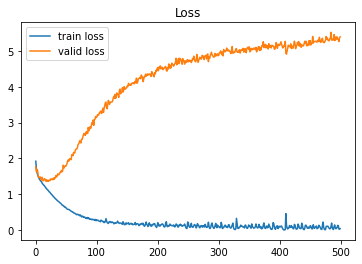

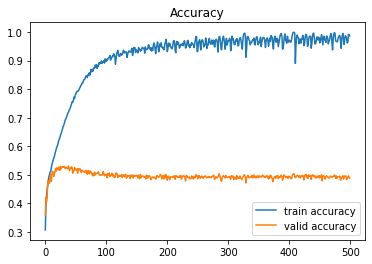

In [7]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [8]:
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=100, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_10 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_11 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 7s 130

50000/50000 [==============================] - 6s 122us/step - loss: 1.6979 - accuracy: 0.4075 - val_loss: 1.7072 - val_accuracy: 0.4045
Epoch 49/100
50000/50000 [==============================] - 6s 129us/step - loss: 1.6947 - accuracy: 0.4089 - val_loss: 1.7029 - val_accuracy: 0.4049
Epoch 50/100
50000/50000 [==============================] - 6s 127us/step - loss: 1.6912 - accuracy: 0.4097 - val_loss: 1.6981 - val_accuracy: 0.4095
Epoch 51/100
50000/50000 [==============================] - 6s 115us/step - loss: 1.6876 - accuracy: 0.4121 - val_loss: 1.7031 - val_accuracy: 0.4025
Epoch 52/100
50000/50000 [==============================] - 5s 108us/step - loss: 1.6845 - accuracy: 0.4128 - val_loss: 1.6929 - val_accuracy: 0.4130
Epoch 53/100
50000/50000 [==============================] - 5s 107us/step - loss: 1.6811 - accuracy: 0.4148 - val_loss: 1.6896 - val_accuracy: 0.4153
Epoch 54/100
50000/50000 [==============================] - 6s 112us/step - loss: 1.6779 - accuracy: 0.4149 - val

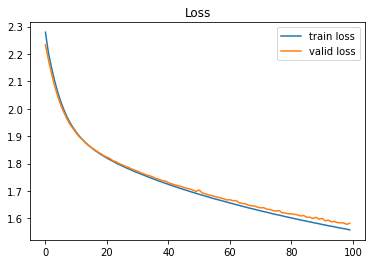

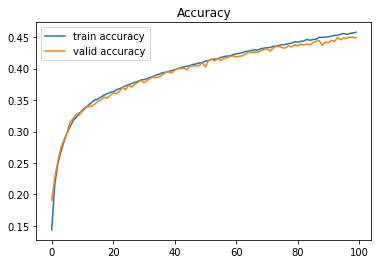

In [9]:
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()